# Challenge Set 2
Topic:        Pandas  
Date:         7/17/16  
Name:         Kevin Cole  
Worked with:  N/A

In [2]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
movies = pd.read_csv('~/ds/metis/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

## Challenge 1

In [4]:
movies.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00


In [5]:
movies.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [6]:
movies.ReleaseDate = pd.to_datetime(movies.ReleaseDate)

In [7]:
movies.ReleaseDate = movies.ReleaseDate.dt.date

In [8]:
movies = movies.sort_values('ReleaseDate')

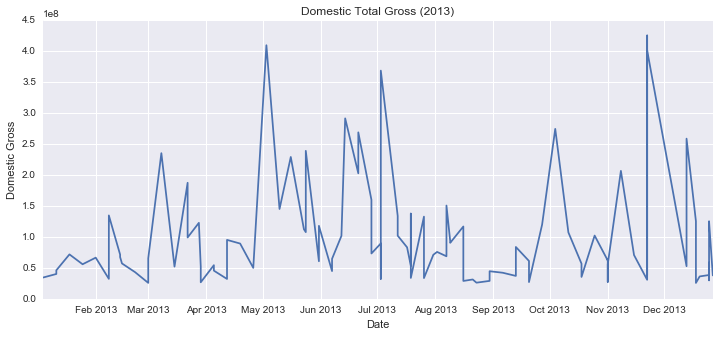

In [9]:
plt.figure(figsize=(12,5))
x = movies.ReleaseDate
y = movies.DomesticTotalGross

plt.plot(x,y,)
plt.ylabel('Domestic Gross')
plt.xlabel('Date')
plt.title('Domestic Total Gross (2013)')

## Challenge 2

In [10]:
movies.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11


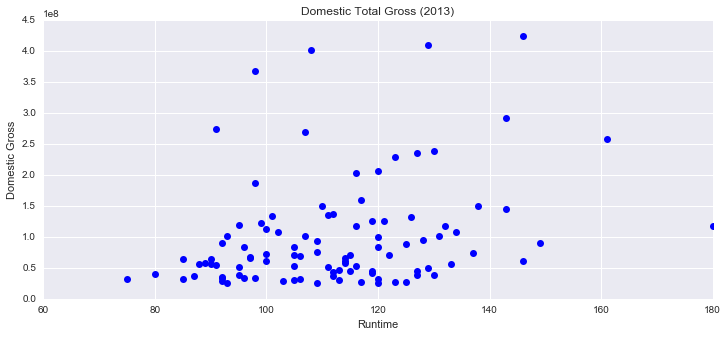

In [11]:
plt.figure(figsize=(12,5))
x = movies.Runtime
y = movies.DomesticTotalGross

plt.plot(x,y, 'bo')
plt.ylabel('Domestic Gross')
plt.xlabel('Runtime')
plt.title('Domestic Total Gross (2013)')

In [12]:
rating = movies.groupby(movies.Rating).mean()

In [13]:
rating.head()

,Budget,DomesticTotalGross,Runtime
Rating,,,
G,NaN,2.684928e+08,107.000000
PG,9.393333e+07,1.311357e+08,99.933333
PG-13,9.660976e+07,1.114498e+08,117.510638
R,3.886364e+07,6.989243e+07,110.729730


## Challenge 4

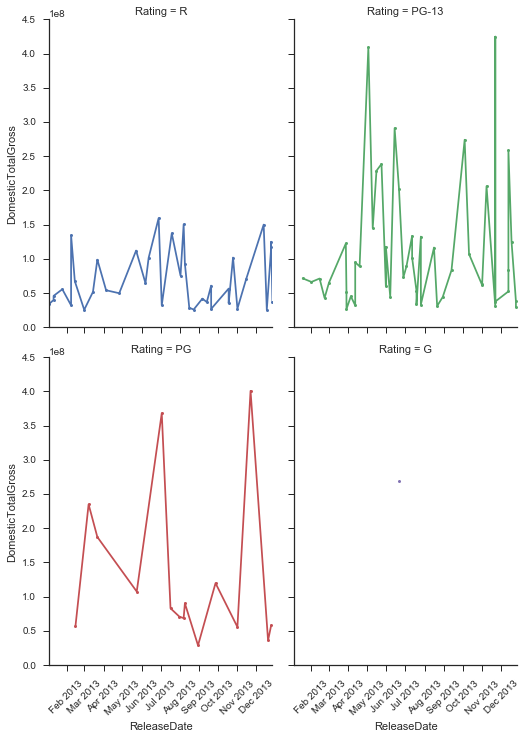

In [14]:
sns.set(style="ticks")

grid = sns.FacetGrid(movies, col='Rating', hue="Rating", size=5.0, col_wrap=2, 
                     aspect=0.75, sharey=True, despine=True)

grid.map(plt.plot, 'ReleaseDate', 'DomesticTotalGross', marker='o', 
         ms=3, ls='-')

for ax in grid.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

## Challenge 5

In [15]:
director = movies.groupby('Director').mean()

In [16]:
director.head(2)

,Budget,DomesticTotalGross,Runtime
Director,,,
Adam McKay,50000000.0,125168368.0,119.0
Alan Taylor,170000000.0,206362140.0,120.0


In [17]:
director = director.reset_index()
director = director.sort_values('DomesticTotalGross', ascending = False)
director.head(1)

,Director,Budget,DomesticTotalGross,Runtime
27,Francis Lawrence,130000000.0,424668047.0,146.0


## Challenge 6

In [18]:
movies['month'] = [int(x.strftime("%m")) for x in movies.ReleaseDate]

In [19]:
movies.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,month
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04,1
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,1


In [31]:
month = movies.groupby('month').mean()
month_std = movies.groupby('month').agg(np.std)

In [32]:
month = month.reset_index()
month = month.sort_values('month')
month_std = month_std.reset_index()
month_std = month_std.sort_values('month')

In [37]:
month.head(13)

,month,Budget,DomesticTotalGross,Runtime
0,1,3.187500e+07,4.954324e+07,94.600000
1,2,4.600000e+07,6.738601e+07,103.857143
2,3,1.013750e+08,9.609710e+07,109.111111
3,4,3.883333e+07,6.094072e+07,114.166667
4,5,1.328750e+08,1.774097e+08,117.875000
5,6,1.001429e+08,1.506500e+08,116.375000
6,7,1.155000e+08,1.057807e+08,108.583333
7,8,5.010000e+07,6.853126e+07,108.818182
8,9,3.916667e+07,6.171231e+07,116.666667
9,10,4.400000e+07,1.150270e+08,108.600000


In [36]:
month_std.head(12)

,month,Budget,DomesticTotalGross,Runtime
0,1,2.749053e+07,1.465947e+07,12.561847
1,2,2.606722e+07,3.283185e+07,9.668309
2,3,7.928058e+07,7.323942e+07,13.242398
3,4,4.102885e+07,2.530104e+07,20.400163
4,5,4.568975e+07,1.117754e+08,16.137246
5,6,8.686278e+07,9.519994e+07,18.133926
6,7,5.686680e+07,9.140837e+07,19.644376
7,8,3.265799e+07,4.132232e+07,11.443934
8,9,2.370162e+07,3.482327e+07,17.511901
9,10,3.489269e+07,9.394330e+07,22.744230


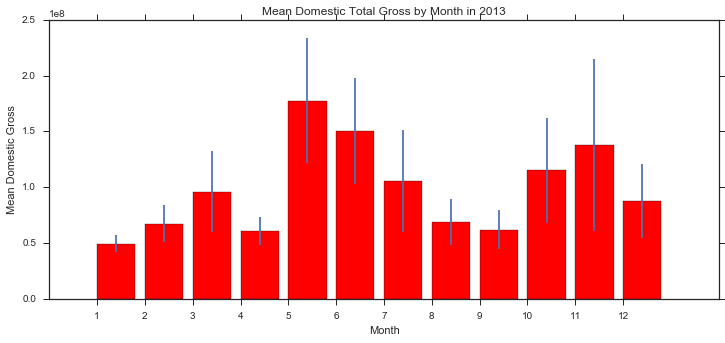

In [38]:
from scipy import stats

plt.figure(figsize=(12,5))

x = month.month
y = month.DomesticTotalGross
serr = month_std.DomesticTotalGross

plt.bar(x,y, color='red', yerr = serr/2)
plt.ylabel('Mean Domestic Gross')
plt.xlabel('Month')
plt.title('Mean Domestic Total Gross by Month in 2013')
_ = plt.xticks(np.arange(min(x), max(x) + 1, 1))

